In [6]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Wczytaj dane
data = pd.read_csv('Analiza_Platkow_Sniadaniowych/Lab-2-Zad-4-dane.csv', sep=';', header=0)
# zamien kropki na przecinki
data = data.replace(',', '.', regex=True)

# Upewnij si?, ?e dane s? liczbowe
data[['cukry', 'weglowodany', 'proteiny', 'tluszcz', 'sod', 'blonnik', 'potas', 'kalorie']] = \
    data[['cukry', 'weglowodany', 'proteiny', 'tluszcz', 'sod', 'blonnik', 'potas', 'kalorie']].apply(pd.to_numeric, errors='coerce')

# Usu? brakuj?ce dane
# usu? nade ktore cukry s? r?wne zero
print(data.info())
# Przygotuj dane wej?ciowe
X = data[['cukry', 'weglowodany', 'proteiny', 'tluszcz', 'sod', 'blonnik', 'potas']]
y = data[['kalorie']]

data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   nazwa         77 non-null     object 
 1   producent     77 non-null     object 
 2   kalorie       77 non-null     float64
 3   cukry         77 non-null     float64
 4   weglowodany   77 non-null     float64
 5   proteiny      77 non-null     float64
 6   tluszcz       77 non-null     float64
 7   sod           77 non-null     float64
 8   blonnik       77 non-null     float64
 9   potas         77 non-null     float64
 10  Liczba_polek  77 non-null     int64  
 11  srodk_polka   77 non-null     object 
 12  polka_1       77 non-null     int64  
 13  polka_2       77 non-null     int64  
 14  polka_3       77 non-null     int64  
dtypes: float64(8), int64(4), object(3)
memory usage: 9.2+ KB
None


,nazwa,producent,kalorie,cukry,weglowodany,proteiny,tluszcz,sod,blonnik,potas,Liczba_polek,srodk_polka,polka_1,polka_2,polka_3
0,100%_Bran,N,0.181818,0.400000,0.000000,0.6,0.2,0.406250,0.714286,0.848024,1,N,0,0,1
1,100%_Natural_Bran,Q,0.636364,0.533333,0.166667,0.4,1.0,0.046875,0.142857,0.407295,3,N,0,0,1
2,All-Bran,K,0.181818,0.333333,0.111111,0.6,0.2,0.812500,0.642857,0.969605,3,N,0,0,1
3,All-Bran_with_Extra_Fiber,K,0.000000,0.000000,0.166667,0.6,0.0,0.437500,1.000000,1.000000,3,N,0,0,1
4,Almond_Delight,R,0.545455,0.533333,0.500000,0.2,0.4,0.625000,0.071429,0.000000,3,N,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,0.545455,0.200000,0.888889,0.2,0.2,0.781250,0.000000,0.179331,3,N,0,0,1
73,Trix,G,0.545455,0.800000,0.444444,0.0,0.2,0.437500,0.000000,0.072948,2,T,0,1,0
74,Wheat_Chex,R,0.454545,0.200000,0.666667,0.4,0.2,0.718750,0.214286,0.346505,1,N,1,0,0
75,Wheaties,G,0.454545,0.200000,0.666667,0.4,0.2,0.625000,0.214286,0.331307,1,N,1,0,0


In [7]:
# podzia? danych na trzy zbiory UCZACY, WALIDACYJNY, TESTOWY

# Podzia? na zbi?r treningowy i testowy
X_train, X_walidacyjne, y_train, y_walidacyjne = train_test_split(X, y, test_size=0.5, random_state=42)

column_names = X_train.columns  # This sets column_names to the actual feature names


X_walidacyjne, X_test, y_walidacyjne, y_test = train_test_split(X_walidacyjne, y_walidacyjne, test_size=0.5, random_state=42)
print(column_names)



# PIERWSZY MODEL Z WSZYTSKIMI PARAMETRAMI LICZBOWYMI
# MODEL MA ZA ZADANIE PRZEWIDZIE? NA PODSTAWIE PARAMETR?W KALOWYCZNOSC
# Dodaj sta?? do modelu
X_train = sm.add_constant(X_train)
X_walidacyjne = sm.add_constant(X_walidacyjne)

# Dopasowanie modelu
wynik = sm.OLS(y_train, X_train).fit()
print(wynik.summary())

#korelacje paramrtow

print(data[['cukry', 'weglowodany', 'proteiny', 'tluszcz', 'sod', 'blonnik', 'potas', 'kalorie']].corr())



Index(['cukry', 'weglowodany', 'proteiny', 'tluszcz', 'sod', 'blonnik',
       'potas'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:                kalorie   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     61.49
Date:                Fri, 17 Jan 2025   Prob (F-statistic):           4.77e-16
Time:                        14:46:10   Log-Likelihood:                 67.747
No. Observations:                  38   AIC:                            -119.5
Df Residuals:                      30   BIC:                            -106.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------

In [8]:
# odrzucamy potas
# X=sm.add_constant(X_train[['cukry', 'weglowodany', 'proteiny', 'tluszcz', 'sod', 'blonnik']])
# y=y_train['kalorie']
# wynik= sm.OLS(y, X).fit()
# print(wynik.summary())
# odrzucamy sod 0.635
# X=sm.add_constant(X_train[['cukry', 'weglowodany', 'proteiny', 'tluszcz', 'blonnik']])
# y=y_train['kalorie']
# wynik= sm.OLS(y, X).fit()
# print(wynik.summary())


# odrzucamy sta??
# X=X_train[['cukry', 'weglowodany', 'proteiny', 'tluszcz', 'blonnik']]
# y=y_train['kalorie']
# wynik= sm.OLS(y, X).fit()
# print(wynik.summary())

# odrzucamy blonnik 0.151
# wynik= sm.OLS(y_train, X_train[['cukry', 'weglowodany', 'proteiny', 'tluszcz']]).fit()
# print(wynik.summary())

# korelacje modelu
print(data[['cukry', 'weglowodany', 'proteiny', 'tluszcz', 'kalorie']].corr())
#
# Zostawiamy Kalorie cykry i t?uszcz

wynik= sm.OLS(y_train, X_train[['cukry', 'tluszcz']]).fit()
print(wynik.summary())




                cukry  weglowodany  proteiny   tluszcz   kalorie
cukry        1.000000    -0.478290 -0.324112  0.275086  0.564092
weglowodany -0.478290     1.000000  0.000140 -0.286187  0.252484
proteiny    -0.324112     0.000140  1.000000  0.208431  0.019066
tluszcz      0.275086    -0.286187  0.208431  1.000000  0.498610
kalorie      0.564092     0.252484  0.019066  0.498610  1.000000
                                 OLS Regression Results                                
Dep. Variable:                kalorie   R-squared (uncentered):                   0.835
Model:                            OLS   Adj. R-squared (uncentered):              0.826
Method:                 Least Squares   F-statistic:                              91.01
Date:                Fri, 17 Jan 2025   Prob (F-statistic):                    8.32e-15
Time:                        14:46:10   Log-Likelihood:                          3.9840
No. Observations:                  38   AIC:                                     -

Rzeczywiste: 0.454545455
Predykcja: 0.255625397018442
--------------------------------
Rzeczywiste: 0.636363636
Predykcja: 0.7483589105320969
--------------------------------
Rzeczywiste: 0.545454545
Predykcja: 0.5586724176204563
--------------------------------
Rzeczywiste: 0.545454545
Predykcja: 0.255625397018442
--------------------------------
Rzeczywiste: 0.636363636
Predykcja: 0.7957805341156693
--------------------------------
Rzeczywiste: 0.909090909
Predykcja: 0.8617194375111462
--------------------------------
Rzeczywiste: 0.545454545
Predykcja: 0.5216378565739982
--------------------------------
Rzeczywiste: 0.181818182
Predykcja: 0.39789026705783465
--------------------------------
Rzeczywiste: 0.363636364
Predykcja: 0.0
--------------------------------
Rzeczywiste: 0.454545455
Predykcja: 0.0948432464558203
--------------------------------
Rzeczywiste: 0.818181818
Predykcja: 0.5586724176204563
--------------------------------
Rzeczywiste: 0.363636364
Predykcja: 0.2371081164

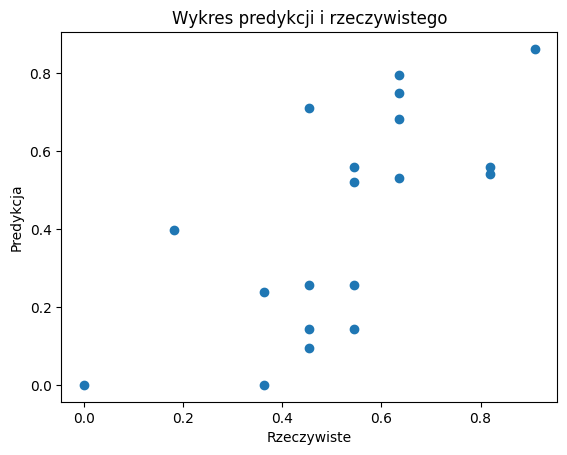

In [9]:
from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error


# Define the calculation functions
def calculate_mae(y_true, y_pred):
    return mean_absolute_error(y_true, y_pred)
def calculate_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))
def calculate_r2(y_true, y_pred):
    return r2_score(y_true, y_pred)
def calculate_me(y_true, y_pred):
    return np.mean(y_true - y_pred)
def calculate_mpe(y_true, y_pred):
    return np.mean((y_true - y_pred) / y_true)
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred) / y_true)
def calculate_u2(y_true, y_pred):
    return np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2)
def calculate_um(y_true, y_pred):
    return np.sum((y_true - y_pred) ** 2) / np.sum(np.abs(y_true - np.mean(y_true)))
def calculate_ur(y_true, y_pred):
    return np.sum((y_true - y_pred) ** 2) / np.sum((np.abs(y_true) + np.abs(y_pred)) ** 2)
def calculate_ud(y_true, y_pred):
    return np.sum((y_true - y_pred) ** 2) / np.sum((np.abs(y_true) + np.abs(y_pred)) / 2)

y_walidacyjne_pred = wynik.predict(X_walidacyjne[['cukry', 'tluszcz']])

y_walidacyjne_1 = y_walidacyjne.squeeze()
y_walidacyjne_pred = y_walidacyjne_pred.squeeze()



for i in range(len(y_walidacyjne_pred)):
    # Safely fetch actual values
    rzeczywiste = y_walidacyjne.iloc[i, 0] if isinstance(y_walidacyjne, pd.DataFrame) else y_walidacyjne.iloc[i]
    print(f"Rzeczywiste: {rzeczywiste}")

    # Use .iloc for positional indexing on y_walidacyjne_pred
    predykcja = y_walidacyjne_pred.iloc[i]
    print(f"Predykcja: {predykcja}")
    print("--------------------------------")

# Predictions for validation data
# wypisac dane rzeczywiste i predykcyjne dla kazdego recordu


# Create a dictionary of metric functions
metrics = {
    "MAE": calculate_mae,
    "RMSE": calculate_rmse,
    "ME": calculate_me,
    "MPE": calculate_mpe,
    "MAPE": calculate_mape,
    "U2": calculate_u2,
    "UM": calculate_um,
    "UR": calculate_ur,
    "UD": calculate_ud
}

# Calculate each metric and store the result
results = {name: func(y_walidacyjne_1, y_walidacyjne_pred) for name, func in metrics.items()}

# Print the results
for name, value in results.items():
    print(f"{name}: {value}")


print(X_walidacyjne[['tluszcz', 'cukry']], y_walidacyjne_1 , y_walidacyjne_pred)

plt.scatter(y_walidacyjne_1, y_walidacyjne_pred)
plt.xlabel("Rzeczywiste")
plt.ylabel("Predykcja")
plt.title("Wykres predykcji i rzeczywistego")
plt.show()


Metryki ewaluacji na danych testowych:
MSE: 0.03
RMSE: 0.18
MAE: 0.14
ME: nan
MPE: nan%
MAPE: nan%


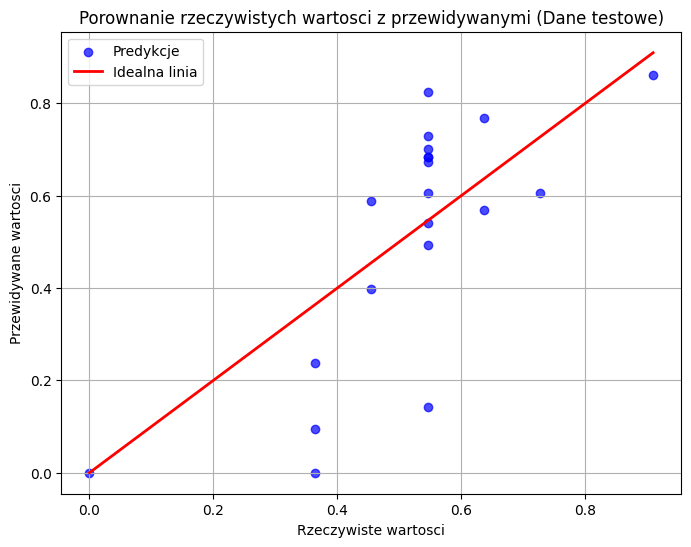

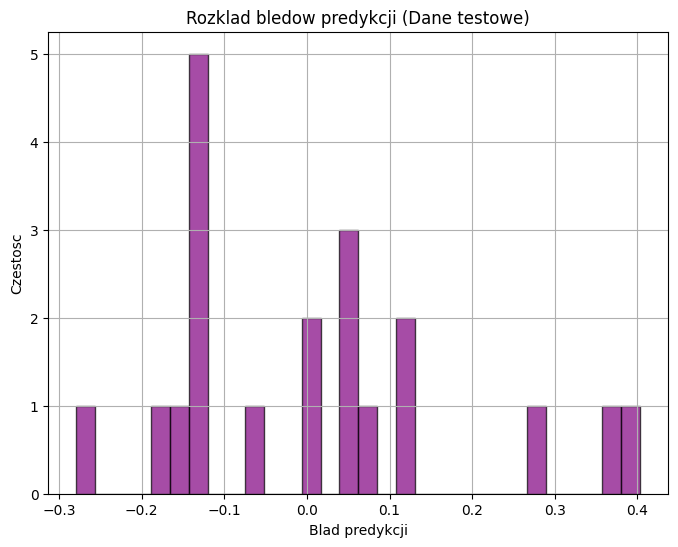


Rzeczywiste i przewidywane wartosci:
Rzeczywiste: 0.55, Predykcja: 0.67, Blad: -0.13
Rzeczywiste: 0.55, Predykcja: 0.68, Blad: -0.14
Rzeczywiste: 0.91, Predykcja: 0.86, Blad: 0.05
Rzeczywiste: 0.64, Predykcja: 0.77, Blad: -0.13
Rzeczywiste: 0.55, Predykcja: 0.68, Blad: -0.14
Rzeczywiste: 0.55, Predykcja: 0.54, Blad: 0.01
Rzeczywiste: 0.55, Predykcja: 0.82, Blad: -0.28
Rzeczywiste: 0.73, Predykcja: 0.61, Blad: 0.12
Rzeczywiste: 0.36, Predykcja: 0.00, Blad: 0.36
Rzeczywiste: 0.55, Predykcja: 0.14, Blad: 0.40
Rzeczywiste: 0.55, Predykcja: 0.70, Blad: -0.16
Rzeczywiste: 0.36, Predykcja: 0.09, Blad: 0.27
Rzeczywiste: 0.36, Predykcja: 0.24, Blad: 0.13
Rzeczywiste: 0.55, Predykcja: 0.73, Blad: -0.18
Rzeczywiste: 0.45, Predykcja: 0.59, Blad: -0.13
Rzeczywiste: 0.64, Predykcja: 0.57, Blad: 0.07
Rzeczywiste: 0.55, Predykcja: 0.49, Blad: 0.05
Rzeczywiste: 0.55, Predykcja: 0.61, Blad: -0.06
Rzeczywiste: 0.00, Predykcja: 0.00, Blad: 0.00
Rzeczywiste: 0.45, Predykcja: 0.40, Blad: 0.06


In [10]:


# Predykcja na danych testowych
y_test_pred = wynik.predict(X_test[['cukry', 'tluszcz']])

# Obliczanie metryk
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

# Metryki b??d?w wzgl?dnych
me = calculate_me(y_test, y_test_pred)
mpe = calculate_mpe(y_test, y_test_pred)
mape = calculate_mape(y_test, y_test_pred)

# Wy?wietlenie wynik?w
print("Metryki ewaluacji na danych testowych:")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"ME: {me:.2f}")
print(f"MPE: {mpe:.2%}")
print(f"MAPE: {mape:.2%}")

# Wykres rzeczywistych warto?ci vs przewidywane
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.7, label='Predykcje')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Idealna linia')
plt.xlabel("Rzeczywiste wartosci")
plt.ylabel("Przewidywane wartosci")
plt.title("Porownanie rzeczywistych wartosci z przewidywanymi (Dane testowe)")
plt.legend()
plt.grid(True)
plt.show()

# Rozk?ad b??d?w
errors = y_test.squeeze() - y_test_pred
plt.figure(figsize=(8, 6))
plt.hist(errors, bins=30, edgecolor='black', color='purple', alpha=0.7)
plt.xlabel("Blad predykcji")
plt.ylabel("Czestosc")
plt.title("Rozklad bledow predykcji (Dane testowe)")
plt.grid(True)
plt.show()

# Wypisanie rzeczywistych i przewidywanych warto?ci dla ka?dego rekordu
print("\nRzeczywiste i przewidywane wartosci:")
for i in range(len(y_test)):
    rzeczywiste = y_test.iloc[i, 0]
    predykcja = y_test_pred.iloc[i]
    print(f"Rzeczywiste: {rzeczywiste:.2f}, Predykcja: {predykcja:.2f}, Blad: {rzeczywiste - predykcja:.2f}")




In [11]:
#wartosci cukr?w ktrorych wartosc jest = 0
# mimo R^2 wi?kszyc niz 0.7
# patrz?c na model dostrzegamy
# wyra?ne rozbie?nosci b??d?w tj. zdarza si? ?e model dopaduje si? odpowiednio do
# danych a innym razem potrafi ca?kowicie zak?adma? obraz oraz ?le oddawa? zale?nosc
# zakrzywiaj? pogl?d na model

# Do zrobienia
# 1. Model potasu (blonnik)
# 2. model logitowy dwuga p??ka od kalorii(X)
# 3. propozycja klasyfikacja p?atek do producenta na podstawie sk?adnik?w (kalorie)

In [12]:
# 1. Model potasu (blonnik)
#
# X = data[['cukry', 'weglowodany', 'proteiny', 'tluszcz', 'sod', 'blonnik', 'kalorie']]
# y = data[['potas']]
#
# X = sm.add_constant(X)
# wynik = sm.OLS(y, X).fit()
# print(wynik.summary())


# # sod 0.973
# X= data[['cukry', 'weglowodany', 'proteiny', 'tluszcz', 'blonnik', 'kalorie']]
# y = data[['potas']]
#
# X = sm.add_constant(X)
# wynik = sm.OLS(y, X).fit()
# print(wynik.summary())


# kalorie 0.26
# X= data[['cukry', 'weglowodany', 'proteiny', 'tluszcz', 'blonnik']]
# y = data[['potas']]
#
# X = sm.add_constant(X)
# wynik = sm.OLS(y, X).fit()
# print(wynik.summary())

# korelacje
# corr= data[['cukry', 'weglowodany', 'proteiny', 'tluszcz', 'blonnik', 'potas']].corr()
# print(corr)

# # blonnik jest skorelowany ujemnie z weglowodany
# X= data[['cukry', 'proteiny', 'tluszcz', 'blonnik']]
# y = data[['potas']]
#
# X = sm.add_constant(X)
# wynik = sm.OLS(y, X).fit()
# print(wynik.summary())

# wypada sta?a
# blonnik jest skorelowany ujemnie z weglowodany
# X= data[['cukry', 'proteiny', 'tluszcz', 'blonnik']]
# y = data[['potas']]
#
# wynik = sm.OLS(y, X).fit()
# print(wynik.summary())

# corr= data[['cukry', 'proteiny', 'tluszcz', 'blonnik', 'potas']].corr()
# print(corr)

# proteiny bo s? najmocnej skorelowane z blonnikiem 0.51
X_train_1= X_train[['tluszcz', 'blonnik']]
y_train_1 = X_train[['potas']]

wynik = sm.OLS(y_train_1, X_train_1).fit()
print(wynik.summary())

corr= data[['cukry', 'tluszcz', 'blonnik', 'potas']].corr()
print(corr)

# predictions_validation_data


                                 OLS Regression Results                                
Dep. Variable:                  potas   R-squared (uncentered):                   0.932
Model:                            OLS   Adj. R-squared (uncentered):              0.928
Method:                 Least Squares   F-statistic:                              245.0
Date:                Fri, 17 Jan 2025   Prob (F-statistic):                    1.09e-21
Time:                        14:46:11   Log-Likelihood:                          33.281
No. Observations:                  38   AIC:                                     -62.56
Df Residuals:                      36   BIC:                                     -59.29
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

MAE na walidacyjnych danych:
0.06733496492579125
RMSE na walidacyjnych danych:
0.09092936906330965
MSE na walidacyjnych danych:
0.007682651221495414
ME na walidacyjnych danych:
0.06191958400897896
MAPE na walidacyjnych danych:
0.3428939582780728


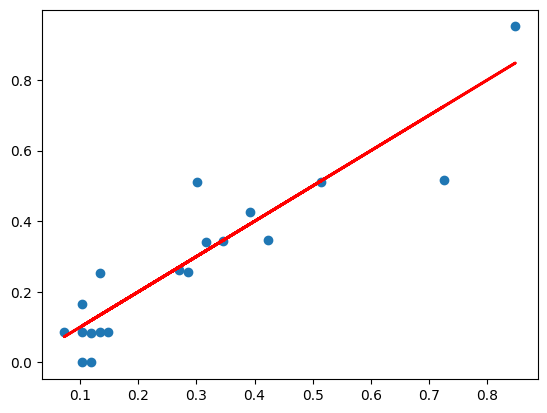

In [13]:
predykcje= wynik.predict(X_walidacyjne[['tluszcz', 'blonnik']])

print("MAE na walidacyjnych danych:")
print(calculate_mae(X_walidacyjne['potas'], predykcje))
print("RMSE na walidacyjnych danych:")
print(calculate_rmse(X_walidacyjne['potas'], predykcje))
print("MSE na walidacyjnych danych:")
print(calculate_me(X_walidacyjne['potas'], predykcje))
print("ME na walidacyjnych danych:")
print(calculate_mpe(X_walidacyjne['potas'], predykcje))
print("MAPE na walidacyjnych danych:")
print(calculate_mape(X_walidacyjne['potas'], predykcje))


plt.scatter(X_walidacyjne['potas'], predykcje)
#linia prosta X=Y
plt.plot(X_walidacyjne['potas'], X_walidacyjne['potas'], color='red', lw=2)



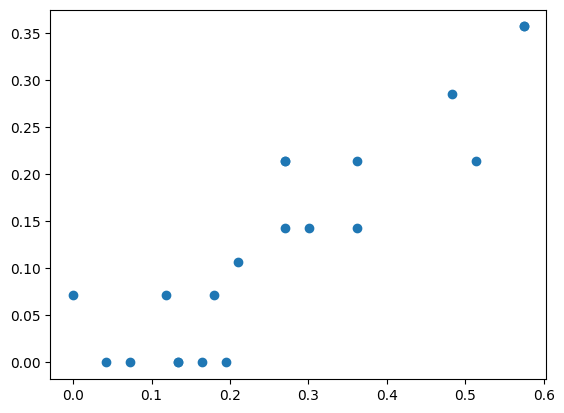

In [14]:
# TESTOWE
predict_test = wynik.predict(X_test[['tluszcz', 'blonnik']])

plt.scatter(X_test['potas'], X_test['blonnik'])


In [15]:
# proteiny bo s? najmocnej skorelowane z blonnikiem 0.51
X_train_1= X_train[['blonnik']]
y_train_1 = X_train[['potas']]

wynik = sm.OLS(y_train_1, X_train_1).fit()
print(wynik.summary())
corr= data[['blonnik', 'potas', 'tluszcz', 'cukry', 'weglowodany', 'proteiny' , 'sod', 'kalorie']].corr()
print(corr)

# predictions_validation_data

                                 OLS Regression Results                                
Dep. Variable:                  potas   R-squared (uncentered):                   0.865
Model:                            OLS   Adj. R-squared (uncentered):              0.861
Method:                 Least Squares   F-statistic:                              236.4
Date:                Fri, 17 Jan 2025   Prob (F-statistic):                    1.19e-17
Time:                        14:46:11   Log-Likelihood:                          20.330
No. Observations:                  38   AIC:                                     -38.66
Df Residuals:                      37   BIC:                                     -37.02
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

MAE na walidacyjnych danych:
0.08197015770496967
RMSE na walidacyjnych danych:
0.1036432380963468
MSE na walidacyjnych danych:
0.05679099523043313
ME na walidacyjnych danych:
0.30450652258564126
MAPE na walidacyjnych danych:
0.3826706355173061


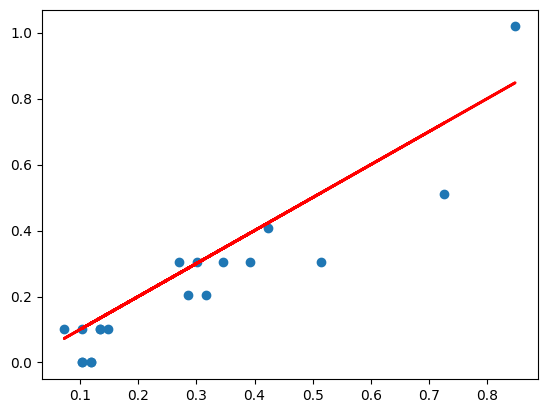

In [16]:
predykcje= wynik.predict(X_walidacyjne[[ 'blonnik']])

print("MAE na walidacyjnych danych:")
print(calculate_mae(X_walidacyjne['potas'], predykcje))
print("RMSE na walidacyjnych danych:")
print(calculate_rmse(X_walidacyjne['potas'], predykcje))
print("MSE na walidacyjnych danych:")
print(calculate_me(X_walidacyjne['potas'], predykcje))
print("ME na walidacyjnych danych:")
print(calculate_mpe(X_walidacyjne['potas'], predykcje))
print("MAPE na walidacyjnych danych:")
print(calculate_mape(X_walidacyjne['potas'], predykcje))


plt.scatter(X_walidacyjne['potas'], predykcje)
#linia prosta X=Y
plt.plot(X_walidacyjne['potas'], X_walidacyjne['potas'], color='red', lw=2)
